In [ ]:
using PyPlot

### Teilaufgabe a

In [1]:
function trapeze(func, start, stop, N)
    h = (stop-start)/(N-1)
    I = -h*(func(start)+func(stop))/2
    for x = linspace(start, stop, N)
        I += h*func(x)
    end
    return I
end

trapeze (generic function with 1 method)

### Teilaufgabe b

In [2]:
I_num = trapeze(sin, 0, pi, 100)
I_ana = -cos(pi)+cos(0)
d_I = abs(I_num-I_ana)
println(@sprintf("Delta I betraegt %E", d_I))

Delta I betraegt 1.678361E-04


### Teilaufgabe c

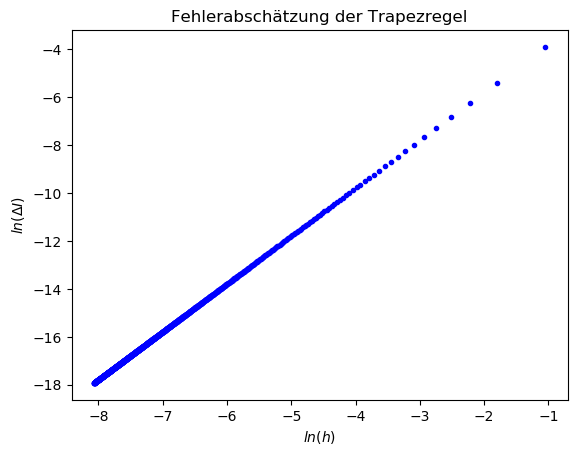

In [34]:
a = 0
b = pi
N_step = 10
I_ana = -cos(pi)+cos(0)
x = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
y = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
i = 1
for N in 10:N_step:10000
    x[i] = log((b-a)/(N-1))
    d_I = abs(trapeze(sin, a, b, N)-I_ana)
    y[i] = log(d_I)
    i += 1
end
p = plot(x, y, "b.")
xlabel("\$ln(h)\$")
ylabel("\$ln(\\Delta I)\$")
title("Fehlerabschätzung der Trapezregel")
show()

### Teilaufgabe d

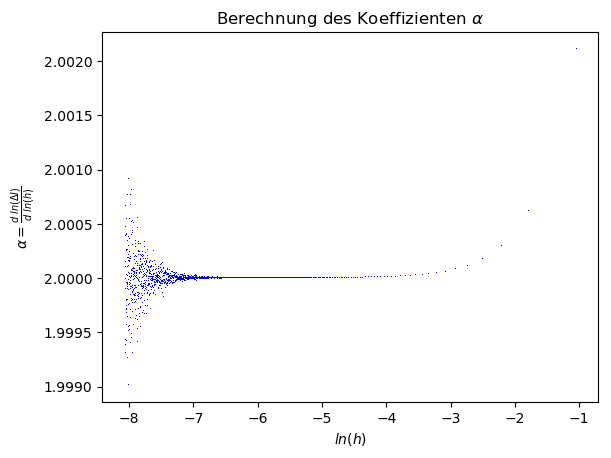

In [42]:
forward_diff_x = Array(Float64, length(x)-1)
forward_diff = Array(Float64, length(x)-1)
for i = 1:length(x)-1
    forward_diff_x[i] = x[i]
    forward_diff[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
end
p = plot(forward_diff_x, forward_diff, "b,")
xlabel("\$ln(h)\$")
ylabel("\$\\alpha = \\frac{d\\ ln(\\Delta I)}{d\\ ln(h)}\$")
title("Berechnung des Koeffizienten \$\\alpha\$")
show()